# Homework 4: Part 2
### Authors:

### 1. Milind Vakharia  (mivakh)
### 2. Prateesh Reddy ()

In [1]:
# importing needed libraries

from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from os import path
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import time


In [2]:
# loading the dataset

mnist = fetch_openml('mnist_784')


In [3]:
print(mnist)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [4]:
X,y=mnist["data"],mnist["target"]
y=y.astype(int)
X=((X/255.)-.5)*2
print(X.shape,y.shape)


(70000, 784) (70000,)


In [5]:
# splitting the dataset into 60,000 training images and remaining for testing

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(60000, 784) (10000, 784) (60000,) (10000,)


In [6]:
# initialising the classifier 

rfcl = RandomForestClassifier(n_jobs=-1)

In [7]:
# training the data and calculating the time taken

start = time.time()
rfcl.fit(X_train, y_train)
y_pred_rf = rfcl.predict(X_test)
end = time.time()
print("Training takes " + str(round(end-start, 2)) +" seconds")


Training takes 6.42 seconds


### It took approximately 7 seconds to train the MNIST training dataset without PCA.

In [8]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

[[ 972    1    0    0    0    2    1    1    2    1]
 [   0 1123    4    1    0    2    2    0    2    1]
 [   5    0 1001    6    3    0    3    8    6    0]
 [   0    0   11  973    0    6    0    8    8    4]
 [   1    0    2    0  959    0    4    0    2   14]
 [   3    0    1   12    3  858    6    1    7    1]
 [   6    3    0    0    4    4  939    0    2    0]
 [   1    2   18    1    1    0    0  998    2    5]
 [   4    0    4    9    4    9    5    4  926    9]
 [   8    4    3    9   12    2    1    3    8  959]]


In [9]:
# Accuracy

diagonal_elements = conf_matrix.diagonal()
acc_list = []
for i in range(0,10):
    accuracy = (diagonal_elements[i]/conf_matrix[i].sum())*100
    acc_list.append(accuracy)
    print("For number " + str(i) +" accuracy is " + str(accuracy) + "%")
    
print()
print("Overall Accuracy: " + str(round(sum(acc_list)/len(acc_list),2)) + "%")


For number 0 accuracy is 99.18367346938776%
For number 1 accuracy is 98.94273127753304%
For number 2 accuracy is 96.99612403100775%
For number 3 accuracy is 96.33663366336633%
For number 4 accuracy is 97.65784114052953%
For number 5 accuracy is 96.18834080717488%
For number 6 accuracy is 98.01670146137788%
For number 7 accuracy is 97.08171206225681%
For number 8 accuracy is 95.07186858316223%
For number 9 accuracy is 95.0445986124876%

Overall Accuracy: 97.05%


### Overall accuracy is approximately 97% without PCA.

### Performing PCA with different Variance Ratios:

In [10]:
# Performing PCA with different variance ratios

cov_list = [0.95, 0.90, 0.85]
overall_acc = []
training_time = []

for cov in cov_list:
    print()
    print("----------------------------------------------------")
    print("VARIANCE RATIO: " + str(cov))
    print("----------------------------------------------------")
    print()
    
    pca = PCA(n_components=cov, svd_solver='full')
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    rfcl = RandomForestClassifier(n_jobs=-1)
    
    start = time.time()
    rfcl.fit(X_train, y_train)
    y_pred_rf = rfcl.predict(X_test)
    end = time.time()
    
    print("Training takes " + str(round(end-start, 2)) +" seconds")
    print()

    training_time.append(end - start)
    
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    
    print("Confusion matrix: ")
    print(conf_matrix)
    print()

    diagonal_elements = conf_matrix.diagonal()
    acc_list = []
    for i in range(0,10):
        accuracy = (diagonal_elements[i]/conf_matrix[i].sum())*100
        acc_list.append(accuracy)
        print("For number " + str(i) +" accuracy is " + str(accuracy) + "%")
    
    overall_acc.append(round(sum(acc_list)/len(acc_list),2))
    print()
    print("Overall Accuracy: " + str(round(sum(acc_list)/len(acc_list),2)) + "%")
    print()
    


----------------------------------------------------
VARIANCE RATIO: 0.95
----------------------------------------------------

Training takes 22.05 seconds

Confusion matrix: 
[[ 957    0    2    2    1    5   10    2    1    0]
 [   0 1118    5    1    2    1    5    0    3    0]
 [  12    0  954   24    5    2    5   10   20    0]
 [   0    0   11  947    1   12    1   17   16    5]
 [   1    0    7    1  935    0    9    5    3   21]
 [   7    0    5   32    5  808   11    6   13    5]
 [  11    2    3    0    4   13  923    0    2    0]
 [   1    6   20    7    9    0    0  956    2   27]
 [   9    0   10   20   11   22    8    7  883    4]
 [   7    4    4   16   29    4    0   29    8  908]]

For number 0 accuracy is 97.6530612244898%
For number 1 accuracy is 98.50220264317181%
For number 2 accuracy is 92.44186046511628%
For number 3 accuracy is 93.76237623762376%
For number 4 accuracy is 95.21384928716904%
For number 5 accuracy is 90.5829596412556%
For number 6 accuracy is 96.

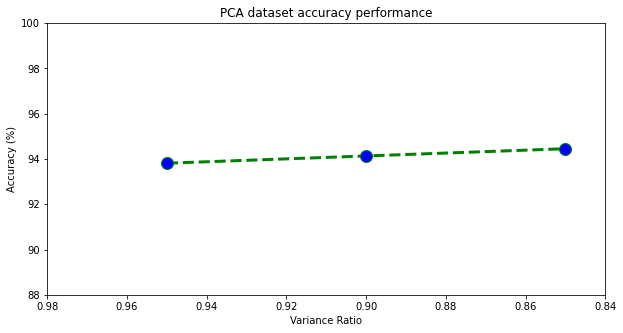

In [11]:
# plotting accuracy against different variance ratios 

plt.figure(figsize=(10,5))

plt.plot(cov_list,overall_acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlim(0.98,0.84)
plt.ylim(88,100)
plt.title("PCA dataset accuracy performance")
plt.xlabel("Variance Ratio")
plt.ylabel("Accuracy (%)")
plt.show()

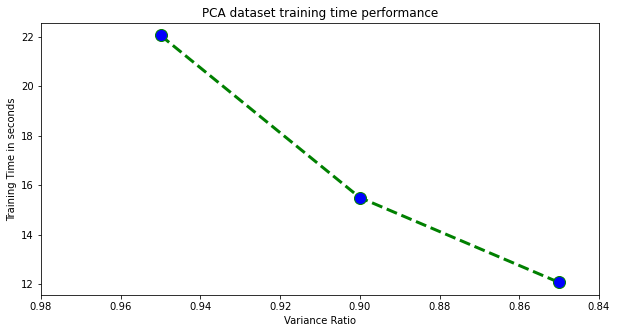

In [12]:
# plotting time taken to train considering different variance ratios

plt.figure(figsize=(10,5))

plt.plot(cov_list,training_time, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.xlim(0.98,0.84)
plt.title("PCA dataset training time performance")
plt.xlabel("Variance Ratio")
plt.ylabel("Training Time in seconds")
plt.show()

## Looking at the above values, many observations can be made with respect to two main attributes i.e., Training time and Accuracy. 

### The observations made with respect to Training Time:
1. Without performing reduction in dimensions (PCA), the training time is very less (approximately 7 seconds) whereas after performing PCA, the training time has increased drastically (approx 15 - 20 seconds). This is more than a 100% increase in training time.

2. After performing PCA, training time varies with respect to the variance ratio. As the variance ratio decreases, the training time decreases. 

### The observations made with respect to Accuracy:
1. Without performing reduction in dimensions (PCA), the accuracy is high (approximately 97%) whereas after performing PCA, the accuracy has decreased but still at a significantly good level.

2. After performing PCA, accuracy varies with respect to the variance ratio. As the variance ratio decreases, the accuracy steadily increases. 

